# Online Retail Sales Assessment

An e-commerce company aims to optimize its marketing and customer retention strategies. Currently, all customers receive the same promotions and communications, but the results are not optimal. To  improve campaign effectiveness, the company has decided to segment its customers into groups with similar characteristics and purchasing behaviors.

- Identify different customer segments based on purchase frequency, spending 
patterns, and transaction volume. 
- Analyze the characteristics of each segment to understand consumption patterns 
and specific needs. 
- Propose personalized marketing strategies for each segment, such as targeted 
promotions, product recommendations, or loyalty programs. 
- Optimize data-driven business decision-making to improve profitability and customer 
satisfaction.

### Dataset description

InvoiceNo	StockCode	Description	Quantity	InvoiceDate	UnitPrice	CustomerID	Country

- `InvoiceNo:` Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- `StockCode:` Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- `Description:` Product (item) name. Nominal.
- `Quantity:` The quantities of each product (item) per transaction. Numeric.
- `InvoiceDate:` Invoice Date and time. Numeric, the day and time when each transaction was generated.
- `UnitPrice:` Unit price. Numeric, Product price per unit
- `CustomerID:` Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- `Country:` Country name. Nominal, the name of the country where each customer resides.



### Structure

1. Data Exploration
2. Missing values
3. Correlations analysis
4. Feature engineering (feature selection, feature transformation, feature creation, and evaluation)
5. Data transformations, such as normalization or standardization. 
6. Model comparison (K-means, Hierarchical clustering, DBSCAN)

### General Model Settings

In [1]:
# Set standard figure size to copy plots to presentation
fs = (15, 7)

# Set random seed

seed = 25


# 1. Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset and check the first rows of the data.

In [3]:
## Load data only if it doesn't exist in the enviroment already to save time

try:
    df_full 
    print('Data already loaded, to reload full dataframe restart the kernel')
except NameError:
    df_full = pd.read_excel('DATA/Online Retail.xlsx')
    print('Data loaded')

Data loaded


In [4]:
df = df_full.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Customer count per country

In [6]:
# Customer count per country 

country_df = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False) / len(df['CustomerID'].unique()) * 100
display(country_df.reset_index().head(20))

,Country,CustomerID
0,United Kingdom,90.327007
1,Germany,2.172422
2,France,1.989481
3,Spain,0.708895
4,Belgium,0.571690
5,Switzerland,0.480220
6,Portugal,0.434484
7,Italy,0.343014
8,Finland,0.274411
9,Austria,0.251544


From this we see that:
-  The total dataset has 541909 rows and only 8 columns.
- `CustomerID` is a float, but it should be an integer.
- `Description` has some missing values
- `InvoiceDate` is already a DataTime object

# 2. Missing / faulty values

In [7]:
missing = df.isna().sum()
missing.sort_values(ascending=False, inplace=True)

display(missing)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

CustomerID seems to have a lot of missing values, so we need to go deeper into this.

In [8]:
display(df[df['CustomerID'].isna()])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Here, we also check for negative quantities and prices:

In [9]:
negative_quantity_pct = (df['Quantity'] < 0).mean() * 100
print(f"Percentage of rows with negative Quantity: {negative_quantity_pct:.2f}%")

len(df[df['UnitPrice'] < 0])

Percentage of rows with negative Quantity: 1.96%


2

**Key Takeaways:**
- Quantity has around 2% of negative values, which might be returns or an error
- UnitPrice has only 2 negative values, so we can consider them as errors

### Initial cleaning and imputation

1) **Impute missing customer IDs** with a placeholder value and convert to integer: 
For transactions without CustomerID we treat each invoice as a separate "customer", extract the invoices without CustomerID and create a synthetic CustomerID for these before adding them back to the main dataset for now; For the analysis we will exclude them to **only work on the real, identified customers.**

In [10]:
# First, extract invoices without CustomerID
invoices_without_customer = df[df['CustomerID'].isna()].copy()

# Create synthetic CustomerIDs based on invoice numbers for these transactions
invoices_without_customer['CustomerID'] = invoices_without_customer['InvoiceNo'].astype(str) + '_anon'

# Clean the CustomerID column to ensure it only contains valid integer-like values
df_with_customer = df.dropna(subset=['CustomerID']).copy()
df_with_customer['CustomerID'] = df_with_customer['CustomerID'].astype(str).str.split('.').str[0] 

# Combine with transactions that have real CustomerIDs
df = pd.concat([
	df_with_customer,
	invoices_without_customer
])

print(df[df['CustomerID'].astype(str).str.endswith('_anon')].shape[0], 'synthetic customer IDs created')

135080 synthetic customer IDs created


2. Remove rows with missing descriptions


In [11]:
df['Description'] = df['Description'].fillna('Unknown Item')

3. Remove returns (negative order quantity) and rows with negative or null unit prices

In [12]:
df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] != 0)]

df = df[(df['Quantity'] > 0) & (df['Quantity'] != 0)]

4. Check for Duplicates

In [13]:
# Check and drop duplicates
duplicate_cols = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']

if duplicate_cols[3] not in duplicate_cols:
    print(f"Column {duplicate_cols[3]} not found in DataFrame. Please check the column names.")
else:
    print(f"Column {duplicate_cols[3]} found in DataFrame. Proceeding with duplicate check.")
    duplicates = df.duplicated(subset=duplicate_cols, keep='first')
    duplicates_count = duplicates.sum()
    print(f"Number of duplicate rows: {duplicates_count}")

df = df[~duplicates]
len(df)

Column Quantity found in DataFrame. Proceeding with duplicate check.
Number of duplicate rows: 5226


524878

### Outlier Analysis & Removal

For the outlier analysis we will use the total amount, meaning that either the quantity or the unit price can be outliers. We will use the IQR method to identify outliers and remove them from the dataset.

In [14]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,524878.0,10.6166,1.0,1.0,4.0,11.0,80995.0,156.280031
InvoiceDate,524878,2011-07-04 15:30:16.317048320,2010-12-01 08:26:00,2011-03-28 12:13:00,2011-07-20 11:22:00,2011-10-19 11:41:00,2011-12-09 12:50:00,NaN
UnitPrice,524878.0,3.922573,0.001,1.25,2.08,4.13,13541.33,36.093028
TotalAmount,524878.0,20.275399,0.001,3.9,9.92,17.7,168469.6,271.693566


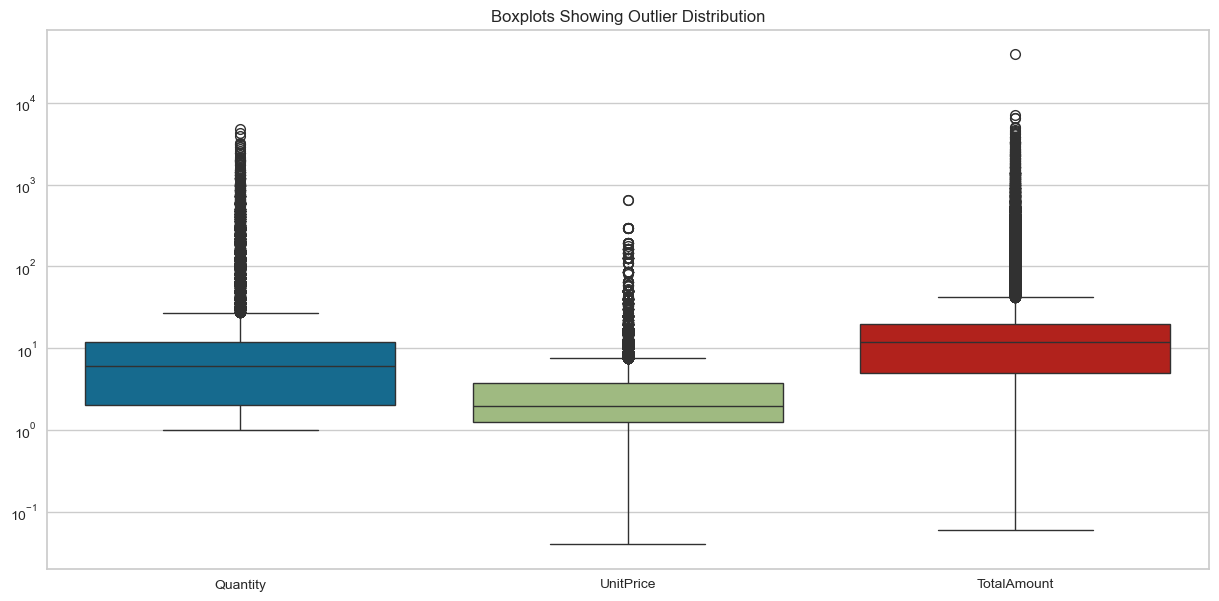

In [55]:
cols = ['Quantity', 'UnitPrice', 'TotalAmount']

# Boxplots to visualize outliers
plt.figure(figsize=fs)
sns.boxplot(data=df[cols])
plt.title('Boxplots Showing Outlier Distribution')
plt.yscale('log')  # Log scale to better visualize the distribution
plt.show()

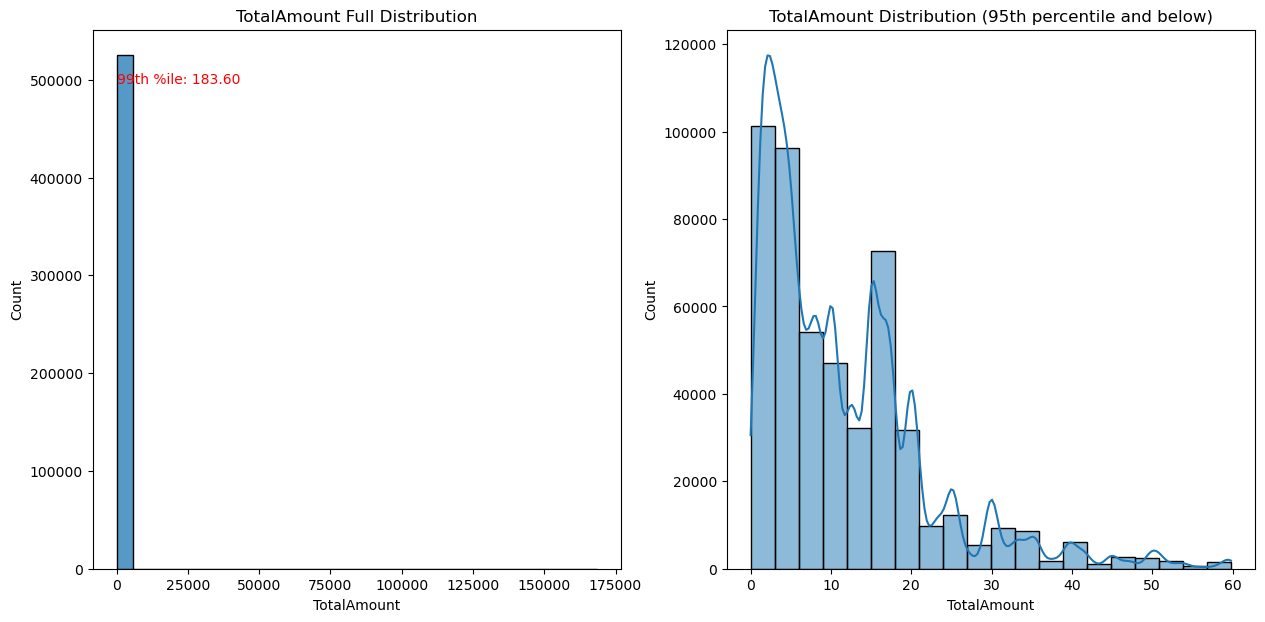


Summary for TotalAmount:
Mean: 20.28
Median: 9.92
Min: 0.00
Max: 168469.60
95th percentile: 59.80
99th percentile: 183.60
% of data above 99th percentile: 1.00%


In [16]:
col = 'TotalAmount'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=fs)

# Original distribution
sns.histplot(data=df, x=col, bins=30, ax=ax1)
ax1.set_title(f'{col} Full Distribution')

# Add 99 percentile lines

pct_val = df[col].quantile(0.99)
ax1.text(pct_val, ax1.get_ylim()[1]*0.9, f'99th %ile: {pct_val:.2f}', color='r')

# Zoomed distribution (without extreme outliers)
upper_limit = df[col].quantile(0.95)
sns.histplot(data=df[df[col] <= upper_limit], x=col, bins=20, ax=ax2, kde=True)
ax2.set_title(f'{col} Distribution (95th percentile and below)')

plt.show()

# Print summary statistics
print(f"\nSummary for {col}:")
print(f"Mean: {df[col].mean():.2f}")
print(f"Median: {df[col].median():.2f}")
print(f"Min: {df[col].min():.2f}")
print(f"Max: {df[col].max():.2f}")
print(f"95th percentile: {df[col].quantile(0.95):.2f}")
print(f"99th percentile: {df[col].quantile(0.99):.2f}")
print(f"% of data above 99th percentile: {(df[col] > df[col].quantile(0.99)).mean()*100:.2f}%")

#### Examine the top 10 highest outliers

In [17]:
for col in cols:
    print(f"\nTop 10 highest {col} values:")
    outliers_high = df.sort_values(by=col, ascending=False).head(10)
    display(outliers_high[['CustomerID', 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'TotalAmount']])


Top 10 highest Quantity values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalAmount
540421,16446,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,168469.60
61619,12346,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,77183.60
421632,12901,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,0.21,1008.00
206121,13135,554868,22197,SMALL POPCORN HOLDER,4300,0.72,3096.00
97432,18087,544612,22053,EMPIRE DESIGN ROSETTE,3906,0.82,3202.92
270885,14609,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,0.06,191.16
160546,15749,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40
52711,15749,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40
433788,16308,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,0.32,960.00
4945,16754,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,0.18,518.40



Top 10 highest UnitPrice values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalAmount
15017,537632_anon,537632,AMAZONFEE,AMAZON FEE,1,13541.33,13541.33
299982,A563185_anon,A563185,B,Adjust bad debt,1,11062.06,11062.06
173382,16029,551697,POST,POSTAGE,1,8142.75,8142.75
297723,562955_anon,562955,DOT,DOTCOM POSTAGE,1,4505.17,4505.17
268028,560373_anon,560373,M,Manual,1,4287.63,4287.63
422351,12536,573077,M,Manual,1,4161.06,4161.06
422376,12536,573080,M,Manual,1,4161.06,4161.06
406406,12744,571751,M,Manual,1,3949.32,3949.32
374542,15502,569382,M,Manual,1,3155.95,3155.95
347948,567353_anon,567353,M,Manual,1,2653.95,2653.95



Top 10 highest TotalAmount values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalAmount
540421,16446,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,168469.60
61619,12346,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,77183.60
222680,15098,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50,38970.00
15017,537632_anon,537632,AMAZONFEE,AMAZON FEE,1,13541.33,13541.33
299982,A563185_anon,A563185,B,Adjust bad debt,1,11062.06,11062.06
173382,16029,551697,POST,POSTAGE,1,8142.75,8142.75
348325,17450,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,5.06,7144.72
52711,15749,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40
160546,15749,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40
421601,14646,573003,23084,RABBIT NIGHT LIGHT,2400,2.08,4992.00


Especially regarding quantity there are two very high outliers at a factor 20x to the next highest value. Only those two values will be removes.

For the unit price, there are also two very high outliers, which don't make sense since they are an "Amazon Fee" and a bad debt adjustments; Both rather seem like an accounting misbooking and thus have to be removed; The **DOTCOM POSTAGE** also seems a bit weird, so this is the last deep-dive we will do.

In [18]:
df = df[~df['InvoiceNo'].isin([581483, 541431])]

Invoice No. 556444 has an error since the set consists of 60 pieces (Quantity should be 1), but the quanity is set to 60, which inflates the total amount. We will correct the quantity to 1

In [19]:
# Set quantity value for invoice 556444

df.loc[df['InvoiceNo'] == 556444, 'Quantity'] = 1

Products will the StockCode `DOT` will also be removed since they are postage articles

In [20]:
df[df['StockCode'] == 'DOT'].value_counts()

InvoiceNo  StockCode  Description     Quantity  InvoiceDate          UnitPrice  CustomerID   Country         TotalAmount
536544     DOT        DOTCOM POSTAGE  1         2010-12-01 14:32:00  569.77     536544_anon  United Kingdom  569.77         1
562955     DOT        DOTCOM POSTAGE  1         2011-08-11 10:14:00  4505.17    562955_anon  United Kingdom  4505.17        1
559491     DOT        DOTCOM POSTAGE  1         2011-07-08 13:53:00  164.54     559491_anon  United Kingdom  164.54         1
559492     DOT        DOTCOM POSTAGE  1         2011-07-08 13:53:00  56.04      559492_anon  United Kingdom  56.04          1
559493     DOT        DOTCOM POSTAGE  1         2011-07-08 13:53:00  166.96     559493_anon  United Kingdom  166.96         1
                                                                                                                           ..
548514     DOT        DOTCOM POSTAGE  1         2011-03-31 16:03:00  282.88     548514_anon  United Kingdom  282.88        

In [21]:
df[df['StockCode'] == 'M'].value_counts()

InvoiceNo  StockCode  Description  Quantity  InvoiceDate          UnitPrice  CustomerID   Country         TotalAmount
536569     M          Manual       1         2010-12-01 15:35:00  1.25       16274        United Kingdom  1.25           1
567353     M          Manual       1         2011-09-19 16:14:00  2653.95    567353_anon  Hong Kong       2653.95        1
567866     M          Manual       5         2011-09-22 14:13:00  0.80       16669        United Kingdom  4.00           1
567485     M          Manual       60        2011-09-20 13:52:00  0.08       15026        United Kingdom  4.80           1
567462     M          Manual       60        2011-09-20 12:35:00  0.08       14446        United Kingdom  4.80           1
                                                                                                                        ..
549739     M          Manual       1         2011-04-12 09:35:00  308.82     15935        United Kingdom  308.82         1
549730     M         

Since the `DOT` sales seem to be postage-related and thus not a true product sale and a manual stock code `M` has no information about the actual product itself, we will remove these rows.

In [22]:
df = df[~df['StockCode'].isin(['DOT', 'M', 'POST'])]

#### Examine the top 10 lowest outliers

In [23]:
for col in cols:
    print(f"\nTop 10 lowest {col} values:")
    outliers_low = df.sort_values(by=col, ascending=True).head(10)
    display(outliers_low[['CustomerID', 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice']])


Top 10 lowest Quantity values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice
541539,581498_anon,581498,85174,S/4 CACTI CANDLES,1,10.79
234696,15507,557595,22427,ENAMEL FLOWER JUG CREAM,1,5.95
234700,15507,557595,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1,2.95
234701,15507,557595,21430,SET/3 RED GINGHAM ROSE STORAGE BOX,1,3.75
234703,15507,557595,20750,RED RETROSPOT MINI CASES,1,7.95
234708,15507,557595,22911,PAPER CHAIN KIT LONDON,1,2.95
234711,15507,557595,21363,HOME SMALL WOOD LETTERS,1,4.95
127839,547248_anon,547248,22858,EASTER TIN KEEPSAKE,1,3.29
127838,547248_anon,547248,22856,ASSORTED EASTER DECORATIONS BELLS,1,15.79
127837,547248_anon,547248,22835,HOT WATER BOTTLE I AM SO POORLY,1,9.13



Top 10 lowest UnitPrice values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice
361741,13405,568375,BANK CHARGES,Bank Charges,1,0.001
359871,16198,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001
279045,15618,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001
157195,13952,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001
427789,13949,573399,16045,POPART WOODEN PENCILS ASST,100,0.040
221726,13694,556267,16045,POPART WOODEN PENCILS ASST,500,0.040
266551,13654,560259,16045,POPART WOODEN PENCILS ASST,100,0.040
302639,13189,563440,16045,POPART WOODEN PENCILS ASST,100,0.040
402329,13265,571496,16045,POPART WOODEN PENCILS ASST,100,0.040
217060,15799,555876,16045,POPART WOODEN PENCILS ASST,100,0.040



Top 10 lowest TotalAmount values:


,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice
359871,16198,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001
157195,13952,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001
279045,15618,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001
361741,13405,568375,BANK CHARGES,Bank Charges,1,0.001
500313,12748,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,0.060
423991,573174_anon,573174,16218,CARTOON PENCIL SHARPENERS,1,0.060
257038,15920,559509,17038,PORCELAIN BUDAH INCENSE HOLDER,1,0.100
241349,14104,558198,17038,PORCELAIN BUDAH INCENSE HOLDER,1,0.100
497822,15858,578479,17038,PORCELAIN BUDAH INCENSE HOLDER,1,0.100
386534,16332,570238,16048,TEATIME ROUND PENCIL SHARPENER,1,0.120


In [24]:
num_pads = len(df[df['StockCode'] == 'PADS'])
num_bank_charges = len(df[df['StockCode'] == 'BANK CHARGES'])

print(f'There are {num_pads} pads in the dataset with a total of {df[df["StockCode"] == "PADS"]["Quantity"].sum()} units sold.')
print(f'There are {num_bank_charges} bank charges in the dataset with a total of {df[df["StockCode"] == "BANK CHARGES"]["Quantity"].sum()} units sold.')

There are 3 pads in the dataset with a total of 3 units sold.
There are 12 bank charges in the dataset with a total of 12 units sold.


Since both `PADS` and the bank charges do not seem like actual products, plus appear only once we remove them:

In [25]:
df = df[~df['StockCode'].isin(["PADS", "BANK CHARGES"])]

# 3. Feature engineering

**RFM Core Metrics**

- **Recency:**  
  Recent customers are more likely to purchase again. By measuring the time since their last purchase, we can identify which customers are still active and target those who might be at risk of churning.

- **Frequency:**  
  Repeated purchasing is a strong indicator of loyalty. Tracking how often a customer makes a purchase helps us recognize our regular buyers and reward their commitment.

- **Monetary:**  
  High spenders are typically our most valuable customers. By summing the total spend per customer, we can focus on those who generate the highest revenue and tailor premium services or offers to them.

**Other Basket Metrics**

- **AvgBasketSize:**  
  This feature helps distinguish bulk buyers from small purchasers. Customers with larger basket sizes might be more interested in deals on quantity or might have different product preferences compared to those who purchase less per transaction.

- **AvgOrderValue:**  
  Identifying high-value versus low-value transactions, regardless of frequency, gives us insight into the purchasing power of our customers. This metric can inform strategies for upselling and cross-selling.

- **DistinctProducts:**  
  Tracking the number of unique products purchased helps us understand customer diversity. Customers buying a variety of items might have broader interests, while those focused on a few products may indicate a niche preference that can be catered to.

**Further Operational KPIs**

- **InvoiceDayOfWeek:**  
  Analyzing the day of the week when purchases occur can uncover patterns in customer behavior, such as peak shopping days, which is critical for timing promotions and managing inventory.

- **InvoiceMonth:**  
  Looking at the month of the invoice provides insights into seasonal trends and helps us plan for fluctuations in demand, ensuring our marketing and operational strategies are aligned with customer buying cycles.


**UK Flag**

Since we have seen that around 90% of the customers come from the UK, we will separate them from the rest of the world using a binary flag.

# Remove anonymized customers
We will remove the anonymized customers from the dataset, since they are not relevant for our analysis.

In [26]:
print("DataFrame before dropping CustomerIDs")
print(df[['StockCode','CustomerID', 'Country', 'InvoiceNo']].nunique())
real_customers = df[~df['CustomerID'].str.endswith('_anon')]['CustomerID'].nunique()
print(f"Number of real customers: {real_customers}")

print(f'Full dataframe shape: {df_full.shape}')

df = df[~df['CustomerID'].str.endswith('_anon')]
print(f'Cleaned dataframe shape: {df.shape}')
print("DataFrame after dropping CustomerIDs")
print(df[['StockCode','CustomerID', 'Country', 'InvoiceNo']].nunique())

DataFrame before dropping CustomerIDs
StockCode      3916
CustomerID     5709
Country          38
InvoiceNo     19779
dtype: int64
Number of real customers: 4333
Full dataframe shape: (541909, 8)
Cleaned dataframe shape: (391281, 9)
DataFrame after dropping CustomerIDs
StockCode      3659
CustomerID     4333
Country          37
InvoiceNo     18403
dtype: int64


In [27]:
# First, create a reference date (last date in the dataset + 1 day)
last_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Extract the month from the InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Extract the day of the week from the InvoiceDate
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Group by CustomerID to create customer-level features
customer_features = df.groupby('CustomerID').agg(
    # Recency - days since last purchase
    Recency=('InvoiceDate', lambda x: (last_date - x.max()).days),
    
    # Frequency - count of invoices (unique)
    Frequency=('InvoiceNo', lambda x: x.nunique()),
    
    # Monetary - total spend
    Monetary=('TotalAmount', 'sum'),
    
    # Alternative/Additional Features
    AvgBasketSize=('Quantity', 'mean'),  # Average items per order
    AvgBasketValue=('TotalAmount', 'mean'),  # Average order value
    DistinctItems=('StockCode', 'nunique'),  # Distinct items purchased 
    
    # Seasonality Features
    MonthsActive=('InvoiceMonth', 'nunique'),  # Number of unique months with purchases
    
    # Country
    Country=('Country', 'first')
).reset_index()

# Calculate purchase consistency (higher value = more consistent buyer)
customer_features['PurchaseConsistency'] = customer_features['Frequency'] / customer_features['MonthsActive']

# Add UK flag
customer_features['IsUK'] = np.where(customer_features['Country'] == 'United Kingdom', 1, 0)

# Determine time range of dataset in months
total_months_in_data = df['InvoiceMonth'].nunique()

# Add purchase coverage - what fraction of available months did the customer purchase in
customer_features['PurchaseCoverage'] = customer_features['MonthsActive'] / total_months_in_data

**Check for outliers in newly created total amount feature**

In [28]:
print(f"\nTop 10 highest total amount values:")
outliers_high = customer_features.sort_values(by='Monetary', ascending=False).head(10)
display(outliers_high)


Top 10 highest total amount values:


,CustomerID,Recency,Frequency,Monetary,AvgBasketSize,AvgBasketValue,DistinctItems,MonthsActive,Country,PurchaseConsistency,IsUK,PurchaseCoverage
1688,14646,2,72,279138.02,95.555340,135.503893,699,13,Netherlands,5.538462,0,1.000000
4196,18102,1,60,259657.30,148.779582,602.453132,150,12,United Kingdom,5.000000,1,0.923077
3724,17450,8,46,194390.79,208.252976,578.544018,124,12,United Kingdom,3.833333,1,0.923077
1878,14911,1,199,140336.83,14.156316,24.759497,1786,13,EIRE,15.307692,0,1.000000
54,12415,24,20,124564.53,108.517532,174.704811,443,10,Australia,2.000000,0,0.769231
1332,14156,10,55,117210.08,41.410753,84.021563,714,12,EIRE,4.583333,0,0.923077
3767,17511,3,31,91062.38,67.029076,94.561142,453,13,United Kingdom,2.384615,1,1.000000
2699,16029,39,62,72708.09,167.112500,302.950375,43,12,United Kingdom,5.166667,1,0.923077
3173,16684,4,28,66653.56,181.425993,240.626570,119,9,United Kingdom,3.111111,1,0.692308
995,13694,4,50,65039.62,111.464789,114.506373,366,13,United Kingdom,3.846154,1,1.000000


# 4. Correlation Analysis

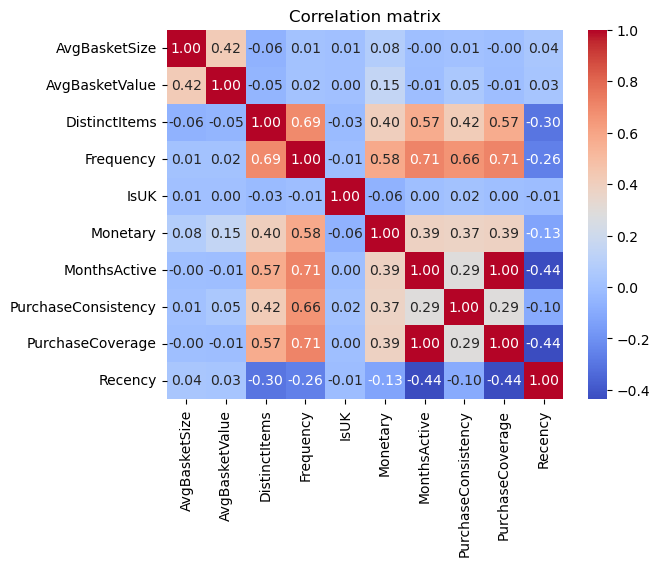

In [29]:
# Compute the correlation matrix
excluded_cols = ['CustomerID', 'Country']

#corr = df[df.columns.difference(excluded_cols)].corr()
corr = customer_features[customer_features.columns.difference(excluded_cols)].corr()


sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

### Correlation Matrix Analysis  

- **Frequency and Distinct Items** have a strong positive correlation (+0.69), meaning that customers who buy frequently also tend to purchase a wider variety of items.  
- **Frequency and Months Active** are highly correlated, which makes sense—customers who have been around longer tend to buy more often.  
- **Purchase Coverage and Frequency** are also strongly linked, suggesting that frequent shoppers engage with multiple product categories.  
- **Recency has a negative correlation with Months Active**, meaning that longer-term customers tend to have less recent purchases—potential sign of disengagement.  
- **Monetary value is most related to Frequency**, confirming that the more often someone buys, the more they spend overall.  

### **Feature Selection for Clustering**  
To improve clustering quality, we should remove redundant or less relevant features:  
- **Drop highly correlated features** to avoid bias:  
  - *PurchaseCoverage* (correlated with *MonthsActive* and *Frequency*).  
  - *MonthsActive* (if *Frequency* is kept, as they are strongly correlated).  
- **Remove Recency** since it represents past inactivity and may not help define active customer segments.  
- **Normalize features** like *Monetary* and *AvgBasketValue* to prevent them from dominating the clustering process.  

**Final Features for Clustering:**  
✔ **AvgBasketSize** (log-transformed)  
✔ **AvgBasketValue** (log-transformed)  
✔ **DistinctItems**  
✔ **Frequency**  
✔ **Monetary** (log-transformed)  
✔ **PurchaseConsistency**  
✔ **UKFlag**

In [30]:
cluster_cols = ['Recency', 'Frequency', 'Monetary_log', 'AvgBasketSize_log', 'AvgBasketValue_log', 'DistinctItems', 'PurchaseConsistency', 'PurchaseCoverage', 'IsUK']

# 5. Data transformations

In [31]:
customer_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           4333 non-null   object 
 1   Recency              4333 non-null   int64  
 2   Frequency            4333 non-null   int64  
 3   Monetary             4333 non-null   float64
 4   AvgBasketSize        4333 non-null   float64
 5   AvgBasketValue       4333 non-null   float64
 6   DistinctItems        4333 non-null   int64  
 7   MonthsActive         4333 non-null   int64  
 8   Country              4333 non-null   object 
 9   PurchaseConsistency  4333 non-null   float64
 10  IsUK                 4333 non-null   int32  
 11  PurchaseCoverage     4333 non-null   float64
dtypes: float64(5), int32(1), int64(4), object(2)
memory usage: 389.4+ KB


### Log Transformation

In [32]:
customer_features_transformed = customer_features.copy()

log_cols = ['Monetary', 'AvgBasketSize', 'AvgBasketValue']

for col in log_cols:
    customer_features_transformed[col + '_log'] = np.log1p(customer_features_transformed[col])

customer_features_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4333.0,92.696515,100.130990,1.000000,18.000000,51.000000,143.000000,374.000000
Frequency,4333.0,4.247173,7.643341,1.000000,1.000000,2.000000,5.000000,206.000000
Monetary,4333.0,1961.287893,8478.728934,2.900000,304.250000,661.520000,1628.560000,279138.020000
AvgBasketSize,4333.0,22.336036,120.119616,1.000000,6.043478,10.000000,14.706897,4300.000000
AvgBasketValue,4333.0,37.236271,240.526107,1.450000,12.256667,17.568000,24.627059,13305.500000
DistinctItems,4333.0,61.446573,85.318001,1.000000,16.000000,35.000000,77.000000,1786.000000
MonthsActive,4333.0,3.005077,2.626042,1.000000,1.000000,2.000000,4.000000,13.000000
PurchaseConsistency,4333.0,1.219805,0.760018,1.000000,1.000000,1.000000,1.250000,34.000000
IsUK,4333.0,0.903531,0.295267,0.000000,1.000000,1.000000,1.000000,1.000000
PurchaseCoverage,4333.0,0.231160,0.202003,0.076923,0.076923,0.153846,0.307692,1.000000


### Histogram of all features

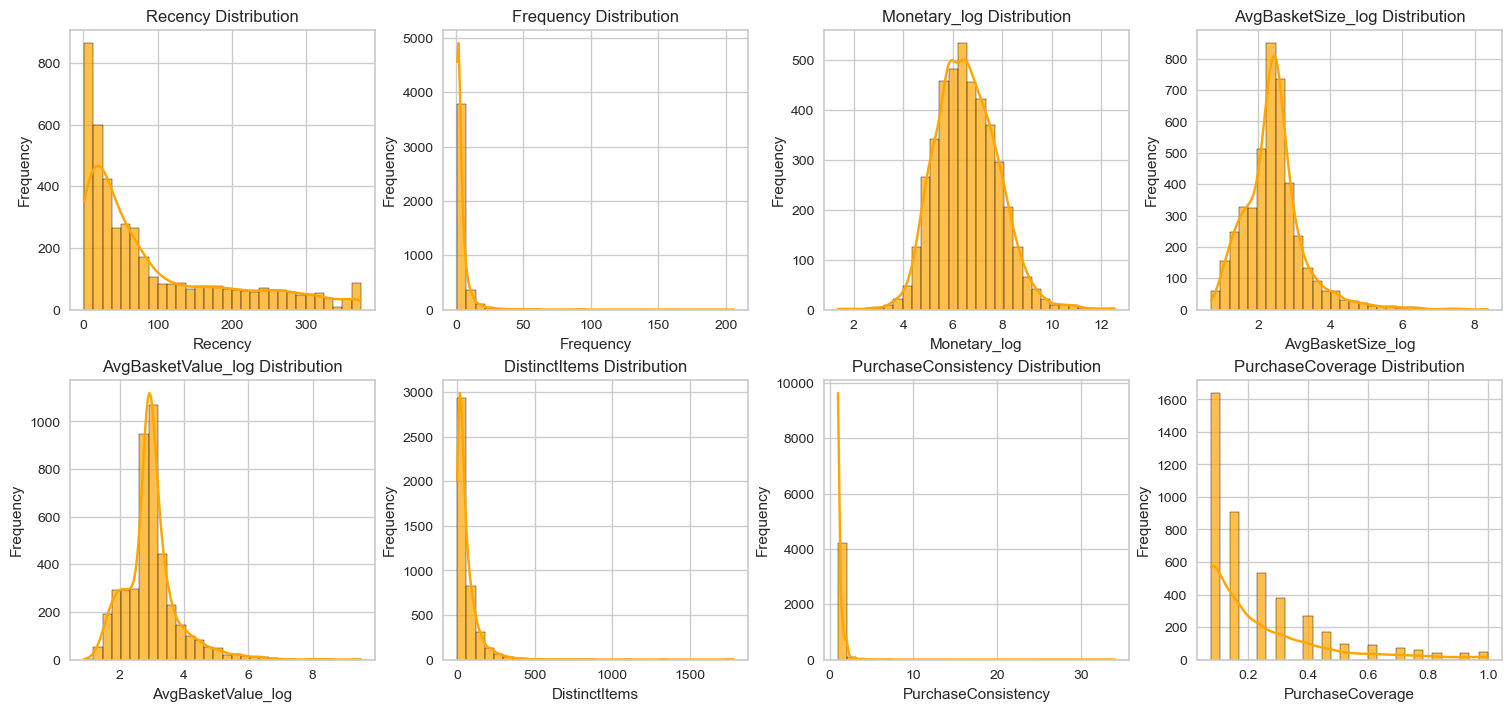

In [56]:
## Create histogram plots for the transformed features in one plot

# Create histogram plots for the transformed features in a grid layout
fig, axes = plt.subplots(2, 4, figsize=fs, constrained_layout=True)

for ax, col in zip(axes.flatten(), cluster_cols):
    sns.histplot(customer_features_transformed[col], bins=30, color = 'orange', kde=True, ax=ax, alpha=0.7)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any unused subplot axes
for ax in axes.flatten()[len(cluster_cols):]:
    fig.delaxes(ax)

plt.show()

### Feature Scaling

In [34]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = customer_features_transformed.copy()
X_scaled[cluster_cols] = scaler.fit_transform(customer_features_transformed[cluster_cols])

X_cluster = X_scaled.drop(['CustomerID', 'Country'] + log_cols, axis=1)
X_cluster.head(3)

,Recency,Frequency,DistinctItems,MonthsActive,PurchaseConsistency,IsUK,PurchaseCoverage,Monetary_log,AvgBasketSize_log,AvgBasketValue_log
0,-0.392,1.25,1.114754,7,0.0,-1.0,1.666667,1.118178,0.344929,0.431780
1,0.192,0.50,-0.229508,4,0.0,-1.0,0.666667,0.462779,2.583874,1.626061
2,-0.256,-0.25,0.606557,1,0.0,-1.0,-0.333333,0.471151,-0.150409,0.204238


# 6. Clustering Algorithm Comparison

## Determining the optimal number of clusters

c:\Users\timos\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\timos\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\timos\miniconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\timos\miniconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\timos\miniconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

Optimal number of clusters (k): 4


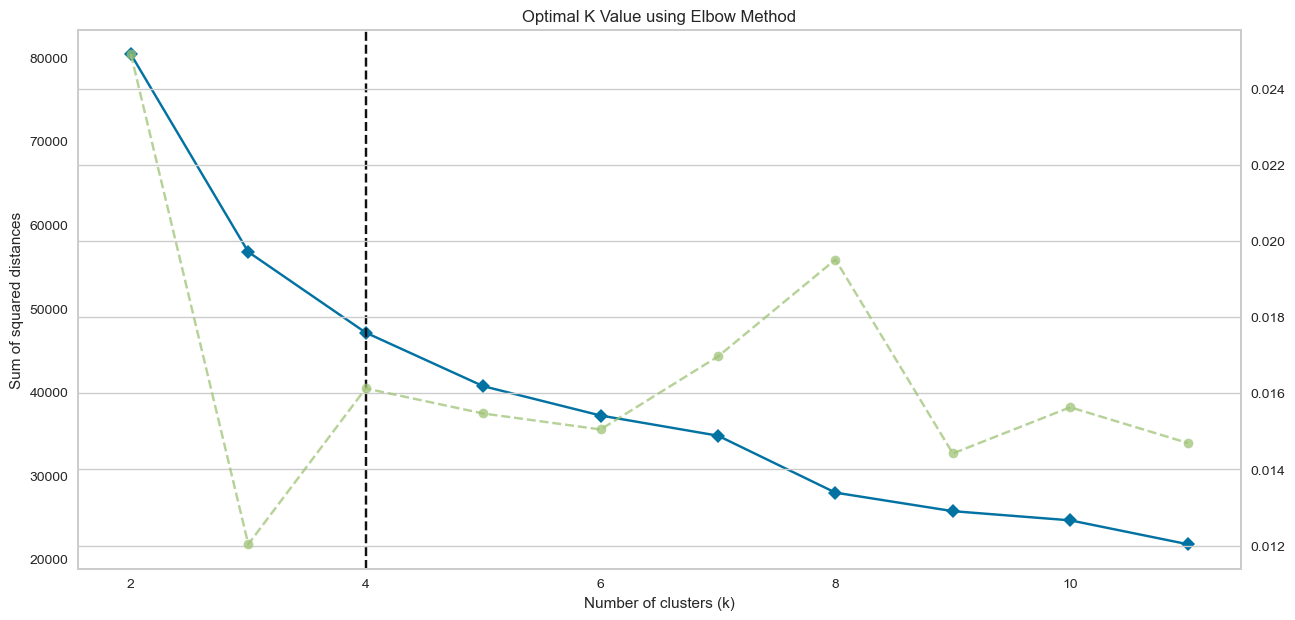

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

plt.figure(figsize=fs)

# Create and fit the visualizer
visualizer = KElbowVisualizer(KMeans(random_state= seed), k=(2, 12), LOKY_MAX_CPU_COUNT=4)
visualizer.fit(X_cluster)

visualizer.ax.set_title('Optimal K Value using Elbow Method')
visualizer.ax.set_xlabel('Number of clusters (k)')
visualizer.ax.set_ylabel('Sum of squared distances')
visualizer.ax.grid(False)

optimal_k = visualizer.elbow_value_
print(f"Optimal number of clusters (k): {optimal_k}")

plt.show()

For n_clusters = 2, the silhouette score is 0.564
For n_clusters = 3, the silhouette score is 0.521
For n_clusters = 4, the silhouette score is 0.369
For n_clusters = 5, the silhouette score is 0.331
For n_clusters = 6, the silhouette score is 0.249
For n_clusters = 7, the silhouette score is 0.231
For n_clusters = 8, the silhouette score is 0.241
For n_clusters = 9, the silhouette score is 0.237
For n_clusters = 10, the silhouette score is 0.239
For n_clusters = 11, the silhouette score is 0.265


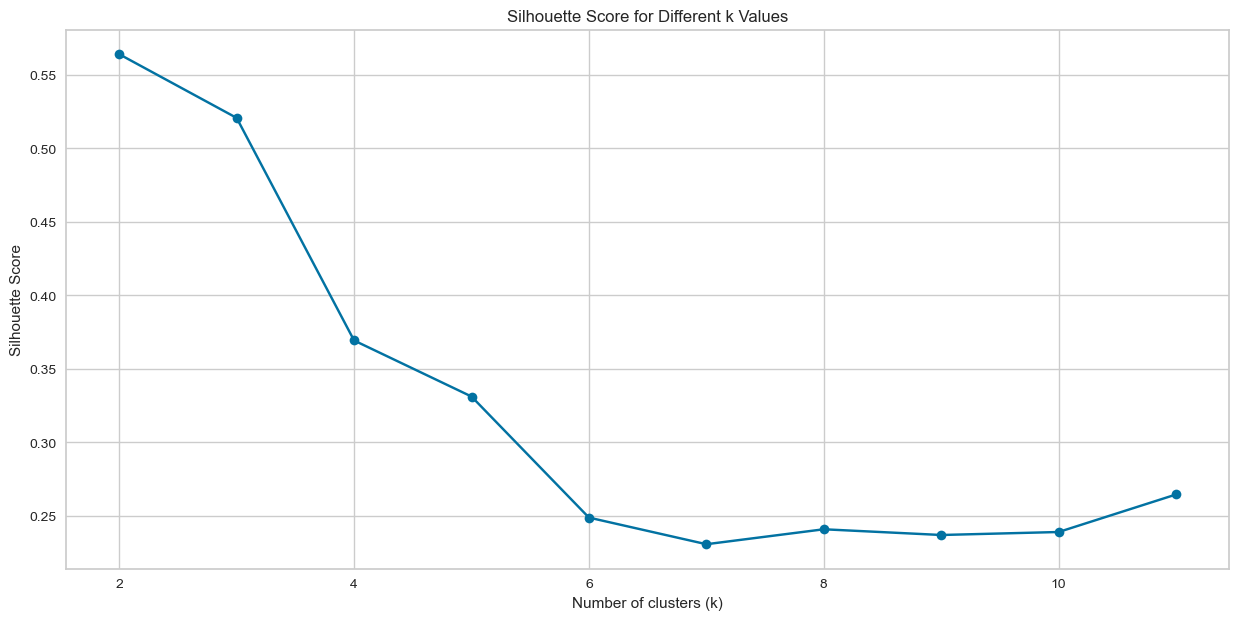

In [36]:
# Calculate silhouette scores for different k values
silhouette_scores = []
k_values = range(2, 12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state= seed)
    cluster_labels = kmeans.fit_predict(X_cluster)
    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

# Plot silhouette scores
plt.figure(figsize=fs)
plt.plot(k_values, silhouette_scores, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()

## K-Means Clustering

In [37]:
kmeans = KMeans(n_clusters=optimal_k, random_state= seed)

customer_features['kM_Cluster'] = kmeans.fit_predict(X_cluster)

# Check cluster sizes
cluster_sizes = customer_features['kM_Cluster'].value_counts()
print("Cluster sizes:")
print(cluster_sizes)

Cluster sizes:
kM_Cluster
0    3003
1    1097
3     229
2       4
Name: count, dtype: int64


## Hierarchical Clustering

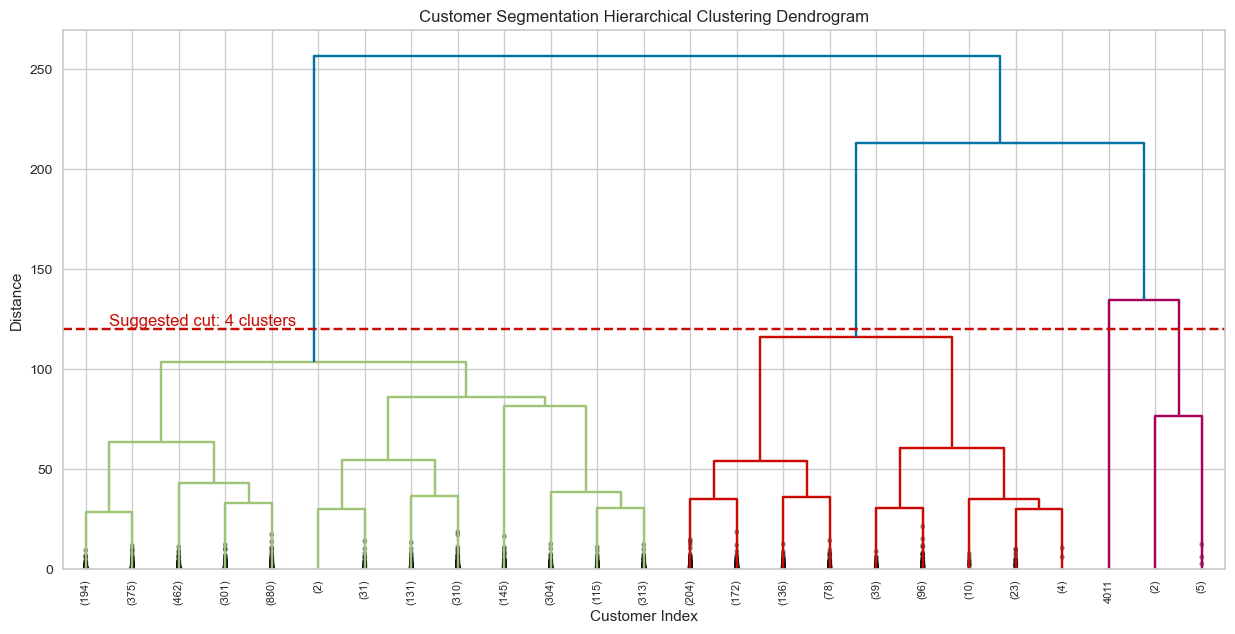

Silhouette Score for Hierarchical Clustering with 4 clusters: 0.491


In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

plt.figure(figsize=fs)

# Apply hierarchical clustering using Ward's method to minimizes variance within clusters
Z = linkage(X_cluster, method='ward')

## --- Display dendrogram --- ##
plt.title('Customer Segmentation Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')

if len(X_cluster) > 100:
    dendrogram(
        Z,
        truncate_mode='lastp',
        p=25,  
        leaf_font_size=8,
        leaf_rotation=90,
        show_contracted=True 
    )
else:
    dendrogram(
        Z,
        leaf_font_size=10,
        leaf_rotation=90
    )

cut_height = 120
plt.axhline(y=cut_height, color='r', linestyle='--')
plt.text(10, cut_height + 2, f'Suggested cut: {optimal_k} clusters', color='r')
plt.show()

hierarchical_labels = fcluster(Z, optimal_k, criterion='maxclust')
customer_features['Hierarchical_Cluster'] = hierarchical_labels

# Calculate silhouette score for the hierarchical clustering
silhouette_hierarchical = silhouette_score(X_cluster, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering with {optimal_k} clusters: {silhouette_hierarchical:.3f}")

## DBSCAN Clustering

### Determining the optimal epsilon value

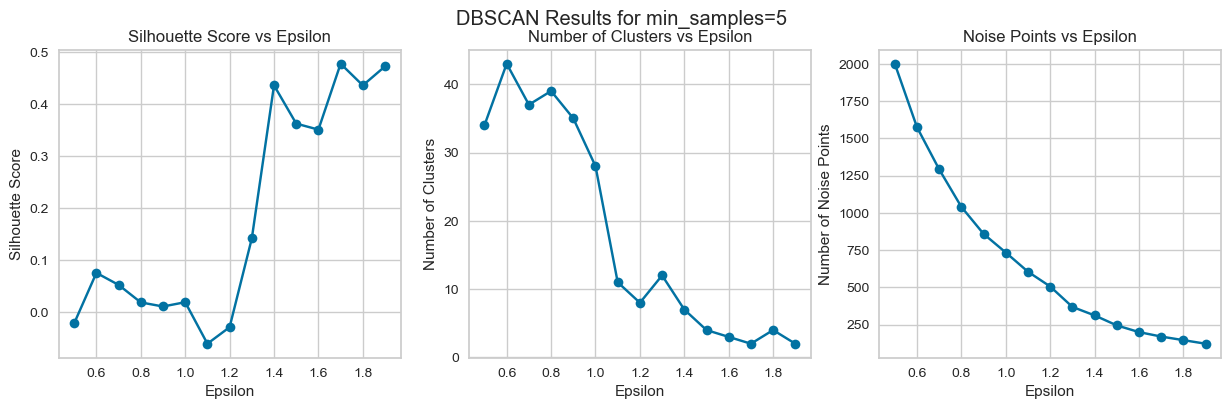

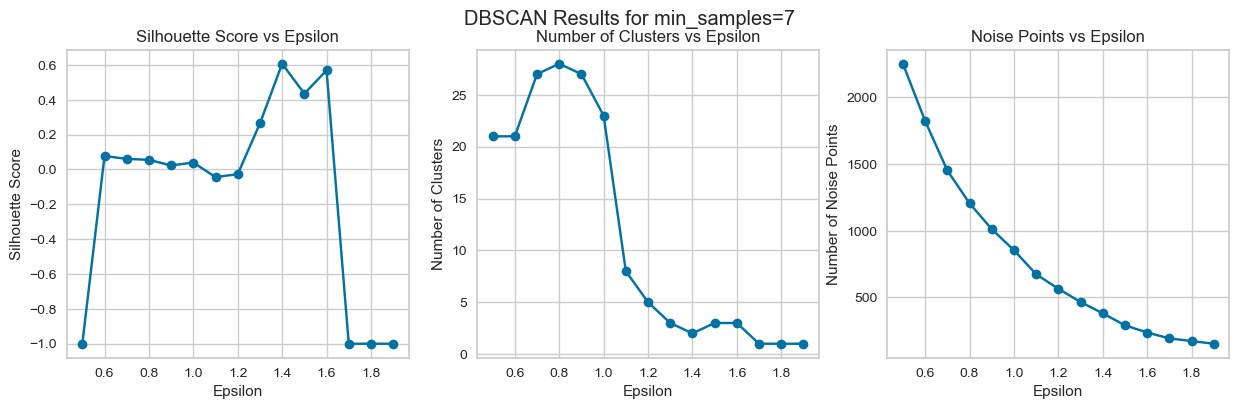

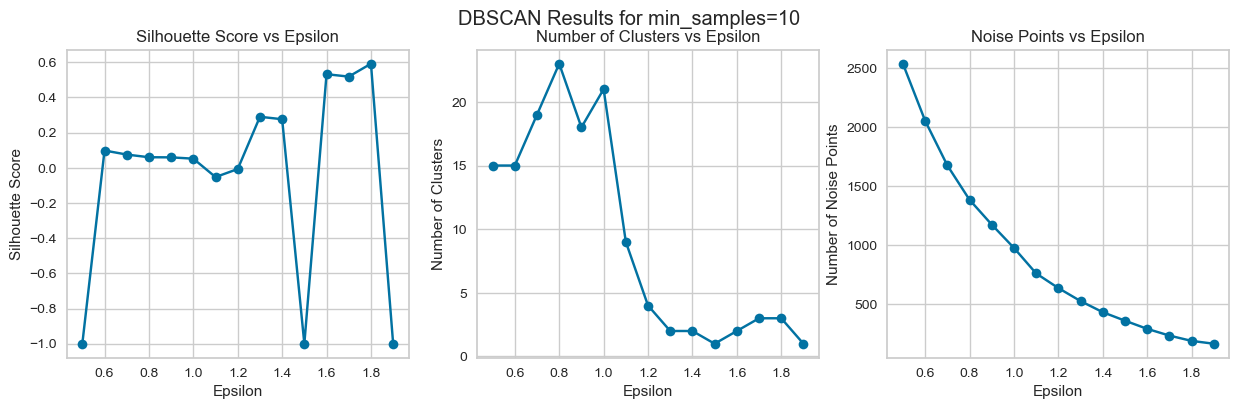


Best DBSCAN parameters:
Epsilon: 1.4
Min Samples: 7.0
Number of clusters: 2.0
Noise points: 381.0 (8.792984075698131%)
Silhouette Score: 0.6071

Top 5 parameter combinations:


,min_samples,eps,n_clusters,n_noise,n_noise_pct,silhouette
24,7,1.4,2,381,8.792984,0.607116
43,10,1.8,3,192,4.431110,0.591429
26,7,1.6,3,237,5.469652,0.568851
41,10,1.6,2,294,6.785137,0.531932
42,10,1.7,3,237,5.469652,0.518161


In [39]:
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.5, 2, 0.1)  # Range of epsilon values to test
min_samples = [5, 7, 10]  # Multiple min_samples values to test

results = []

for min_sample in min_samples:
    silhouette_scores = []
    n_clusters_list = []
    n_noise_list = []
    
    for eps in eps_values:
            
        # Fit DBSCAN with current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        labels = dbscan.fit_predict(X_cluster)
        
        # Count unique clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Calculate silhouette score if we have valid clusters
        if n_clusters > 1 and n_noise < len(X_cluster) * 0.5:  # Avoid extreme cases
            try:
                # Only include non-noise points in silhouette calculation
                non_noise_mask = labels != -1
                if np.sum(non_noise_mask) > n_clusters:  # Need more points than clusters
                    silhouette_avg = silhouette_score(
                        X_cluster[non_noise_mask], 
                        labels[non_noise_mask]
                    )
                else:
                    silhouette_avg = -1  # Invalid case
            except:
                silhouette_avg = -1  # Error case
        else:
            silhouette_avg = -1  # Invalid clustering
            
        silhouette_scores.append(silhouette_avg)
        n_clusters_list.append(n_clusters)
        n_noise_list.append(n_noise)
        
        # Store results
        results.append({
            'min_samples': min_sample,
            'eps': eps,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'n_noise_pct': n_noise / len(X_cluster) * 100,
            'silhouette': silhouette_avg
        })
        
    # Plot results for this min_samples value
    plt.figure(figsize= (15, 4))
    plt.suptitle(f'DBSCAN Results for min_samples={min_sample}')
    
    plt.subplot(1, 3, 1)
    plt.plot(eps_values[:len(silhouette_scores)], silhouette_scores, 'o-')
    plt.xlabel('Epsilon')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Epsilon')
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.plot(eps_values[:len(n_clusters_list)], n_clusters_list, 'o-')
    plt.xlabel('Epsilon')
    plt.ylabel('Number of Clusters')
    plt.title('Number of Clusters vs Epsilon')
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.plot(eps_values[:len(n_noise_list)], n_noise_list, 'o-')
    plt.xlabel('Epsilon')
    plt.ylabel('Number of Noise Points')
    plt.title('Noise Points vs Epsilon')
    plt.grid(True)
    plt.show()

results_df = pd.DataFrame(results)
valid_results = results_df[results_df['silhouette'] > 0].copy()

# Find the best parameter combination based on silhouette score
if len(valid_results) > 0:
    best_params = valid_results.loc[valid_results['silhouette'].idxmax()]
    print("\nBest DBSCAN parameters:")
    print(f"Epsilon: {best_params['eps']}")
    print(f"Min Samples: {best_params['min_samples']}")
    print(f"Number of clusters: {best_params['n_clusters']}")
    print(f"Noise points: {best_params['n_noise']} ({best_params['n_noise_pct']}%)")
    print(f"Silhouette Score: {best_params['silhouette']:.4f}")
    
    # Show top 5 parameter combinations
    print("\nTop 5 parameter combinations:")
    display(valid_results.sort_values('silhouette', ascending=False).head())
else:
    print("No valid clustering configurations found.")

In [40]:
# Apply the optimal DBSCAN parameters
optimal_eps = best_params['eps']
optimal_min_samples = int(best_params['min_samples'])

# Run DBSCAN with optimal parameters
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
customer_features['DBSCAN_Cluster'] = dbscan_optimal.fit_predict(X_cluster)

# Calculate the percentage of noise points
noise_percentage = (customer_features['DBSCAN_Cluster'] == -1).mean() * 100
print(f"Percentage of noise points: {noise_percentage:.2f}%")

# Display the distribution of clusters
dbscan_cluster_counts = customer_features['DBSCAN_Cluster'].value_counts().sort_index()
print("\nDBSCAN cluster distribution:")
print(dbscan_cluster_counts)

Percentage of noise points: 8.79%

DBSCAN cluster distribution:
DBSCAN_Cluster
-1     381
 0    3943
 1       9
Name: count, dtype: int64


## Evaluation of Clustering Results

1. Defining analysis metrics (available information from customer features)
2. Comparing the different clustering methods


In [41]:
available_infos = customer_features.columns
print("Available features in the dataset:")
print(available_infos)

Available features in the dataset:
Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'AvgBasketSize',
       'AvgBasketValue', 'DistinctItems', 'MonthsActive', 'Country',
       'PurchaseConsistency', 'IsUK', 'PurchaseCoverage', 'kM_Cluster',
       'Hierarchical_Cluster', 'DBSCAN_Cluster'],
      dtype='object')


In [42]:
info_dict = {
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'AvgBasketSize': 'mean',
    'AvgBasketValue': 'mean',
    'DistinctItems': 'mean',
    'PurchaseConsistency': 'mean',
    'PurchaseCoverage': 'mean',
    'IsUK': 'mean',
    'CustomerID': 'count' 
}

### Calculating the customer characteristics for each cluster

In [43]:
km_cluster_analysis = customer_features.groupby('kM_Cluster').agg(info_dict).rename(columns={'CustomerID': 'Num_Customers'})
hierarchical_cluster_profile = customer_features.groupby('Hierarchical_Cluster').agg(info_dict).rename(columns={'CustomerID': 'Num_Customers'})
dbscan_cluster_profile = customer_features.groupby('DBSCAN_Cluster').agg(info_dict).rename(columns={'CustomerID': 'Num_Customers'})

km_cluster_analysis.index.name = "Cluster"
hierarchical_cluster_profile.index.name = "Cluster"
dbscan_cluster_profile.index.name = "Cluster"


print("\nKMeans Cluster Analysis:")
display(km_cluster_analysis.sort_values(by='Num_Customers', ascending=False))
print("\nHierarchical Cluster Analysis:")
display(hierarchical_cluster_profile.sort_values(by='Num_Customers', ascending=False))
print("\nDBSCAN Cluster Analysis:")
display(dbscan_cluster_profile.sort_values(by='Num_Customers', ascending=False))


KMeans Cluster Analysis:


,Recency,Frequency,Monetary,AvgBasketSize,AvgBasketValue,DistinctItems,PurchaseConsistency,PurchaseCoverage,IsUK,Num_Customers
Cluster,,,,,,,,,,
0,119.729937,1.788212,630.478009,22.660392,39.642424,33.751915,1.106671,0.123799,0.903430,3003
1,35.829535,6.547858,2523.550191,19.104029,26.760667,105.092981,1.266189,0.401164,0.901550,1097
3,10.585153,23.087336,15802.295240,33.830151,56.273877,195.235808,2.176330,0.815250,0.917031,229
2,94.000000,140.750000,54468.702500,7.166124,13.847961,1223.750000,18.673077,0.769231,0.750000,4



Hierarchical Cluster Analysis:


,Recency,Frequency,Monetary,AvgBasketSize,AvgBasketValue,DistinctItems,PurchaseConsistency,PurchaseCoverage,IsUK,Num_Customers
Cluster,,,,,,,,,,
1,107.814763,2.273365,831.725313,22.474443,37.445277,43.523435,1.124240,0.154537,0.900084,3563
2,22.473753,12.304462,6790.600328,21.799145,36.447087,136.700787,1.544692,0.582576,0.919948,762
3,1.857143,127.571429,50713.498571,12.688760,19.486890,998.142857,9.813187,1.000000,0.857143,7
4,372.000000,34.000000,5391.210000,5.835017,18.152222,21.000000,34.000000,0.076923,1.000000,1



DBSCAN Cluster Analysis:


,Recency,Frequency,Monetary,AvgBasketSize,AvgBasketValue,DistinctItems,PurchaseConsistency,PurchaseCoverage,IsUK,Num_Customers
Cluster,,,,,,,,,,
0,97.109054,3.026629,1029.006708,14.634174,24.700599,50.878519,1.123200,0.198716,0.905909,3943
-1,49.026247,16.535433,11507.771207,102.386663,167.543301,165.658793,2.207599,0.552594,0.876640,381
1,8.222222,18.777778,6269.573333,7.797806,12.922620,279.777778,1.726768,0.837607,1.000000,9


#### k-Means

#### Hierarchical

#### DBSCAN

#### Confusion Matrix k-Means vs. Hierarchical

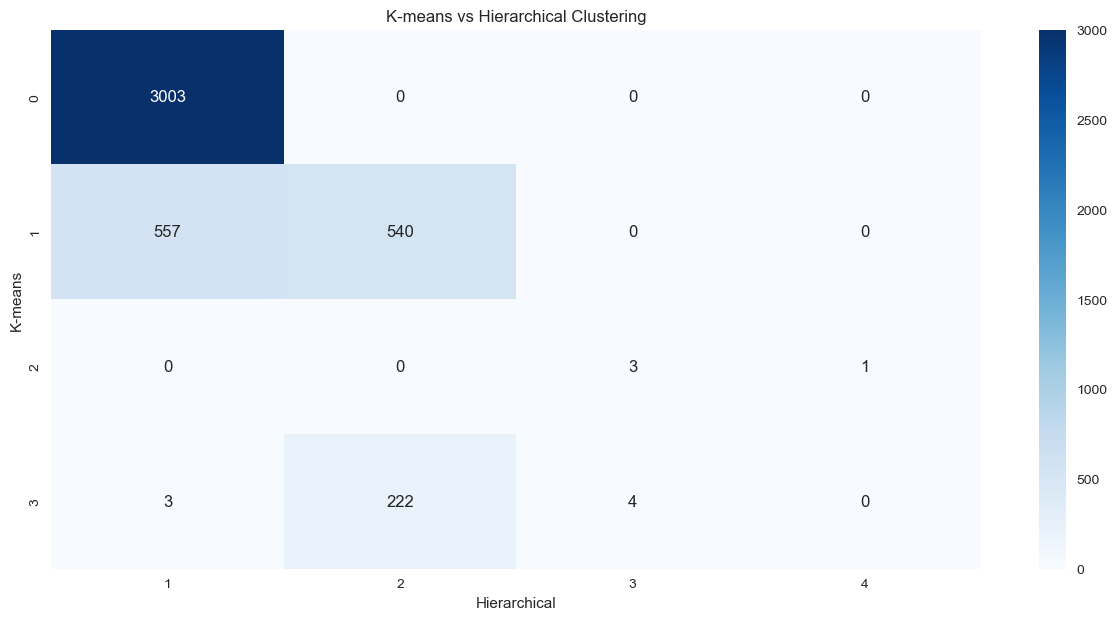

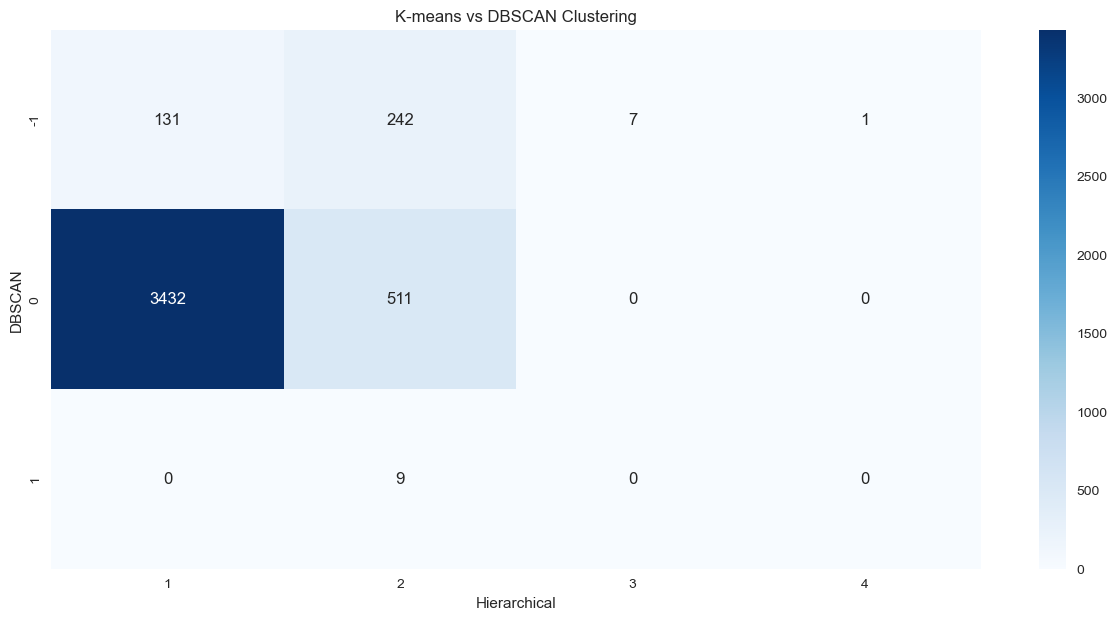

In [53]:
plt.figure(figsize=fs)
plt.title('K-means vs Hierarchical Clustering')


cross_tab_kmeans = pd.crosstab(
    customer_features['kM_Cluster'], 
    customer_features['Hierarchical_Cluster'],
    rownames=['K-means'], 
    colnames=['Hierarchical'],
)

sns.heatmap(cross_tab_kmeans, annot=True, fmt='d', cmap='Blues')

plt.figure(figsize=fs)
plt.title('K-means vs DBSCAN Clustering')

cross_tab_dbscan = pd.crosstab(
    customer_features['DBSCAN_Cluster'], 
    customer_features['Hierarchical_Cluster'],
    rownames=['DBSCAN'], 
    colnames=['Hierarchical'],
)

sns.heatmap(cross_tab_dbscan, annot=True, fmt='d', cmap='Blues')

plt.show()


kM_Cluster has 4 clusters (sorted by size, noise last)


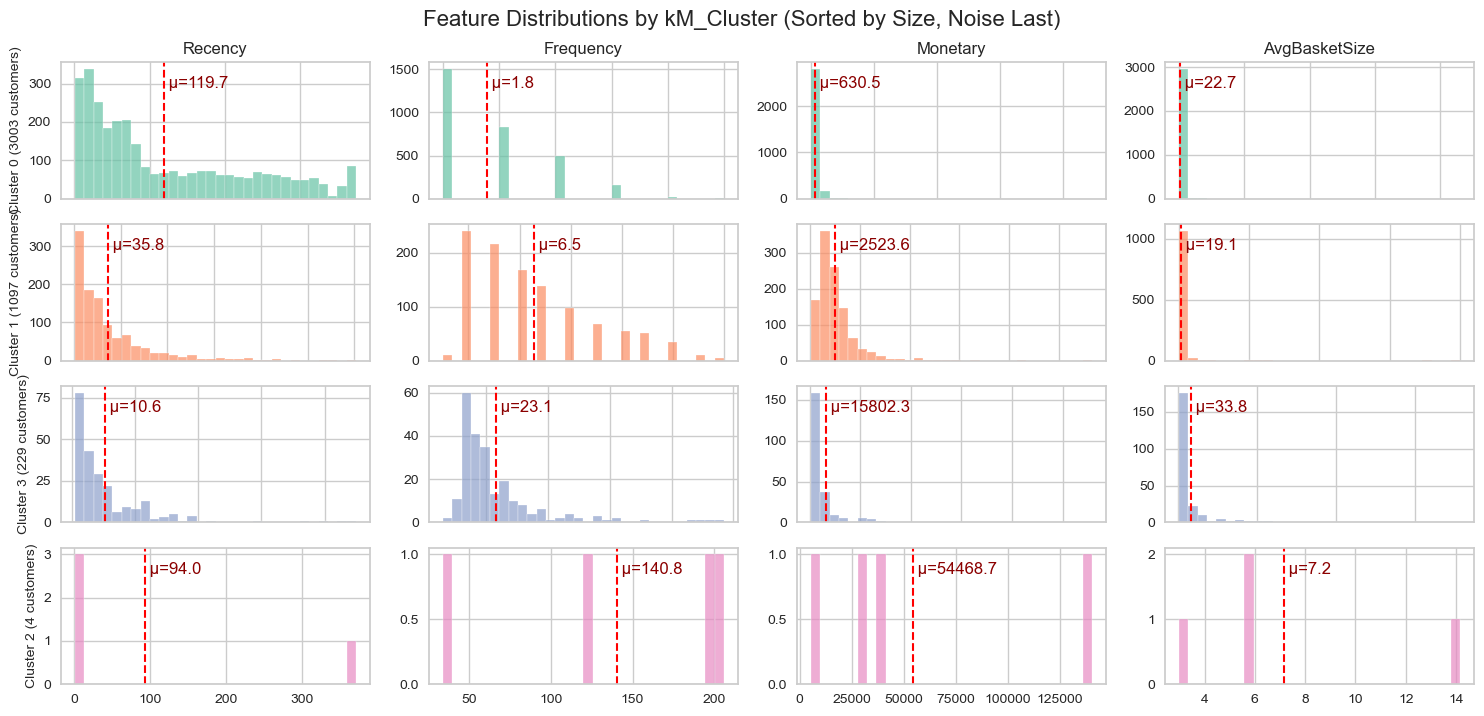


Hierarchical_Cluster has 4 clusters (sorted by size, noise last)


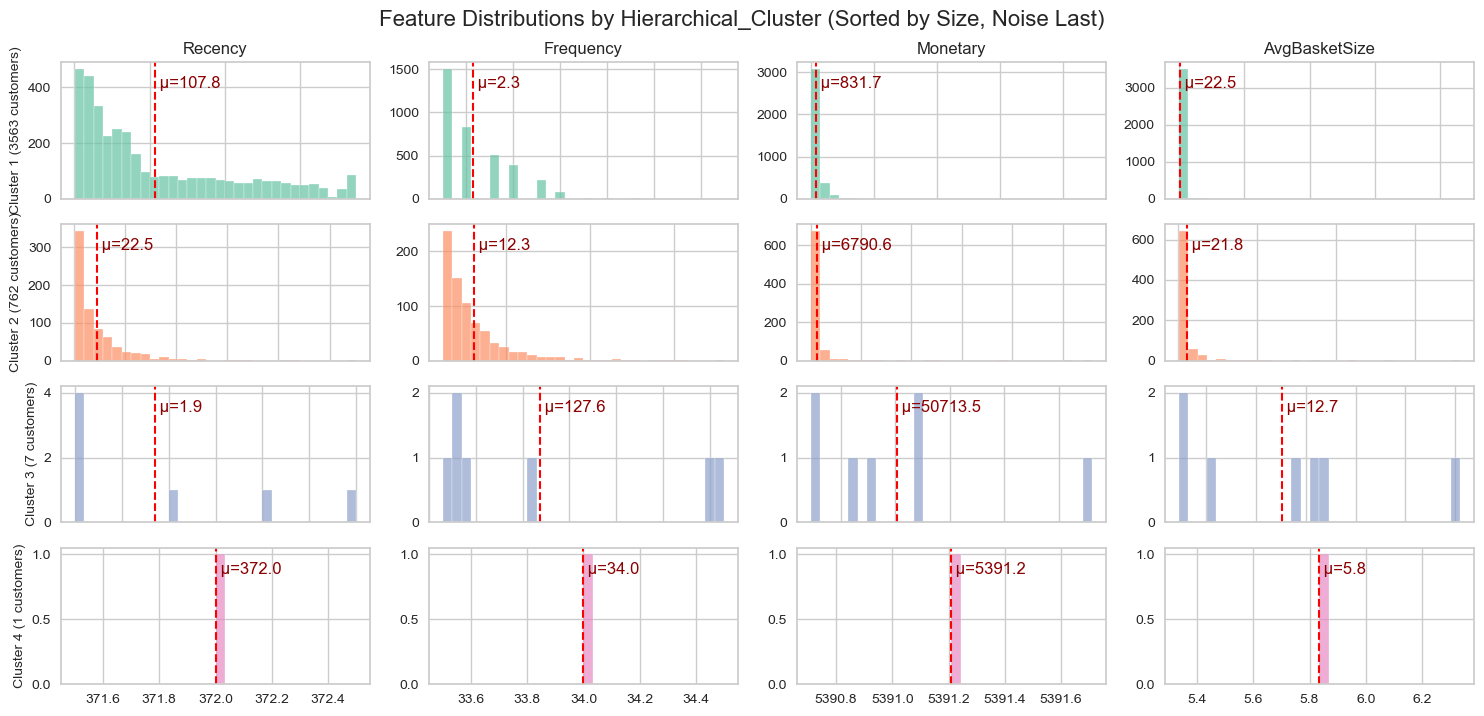


DBSCAN_Cluster has 3 clusters (sorted by size, noise last)


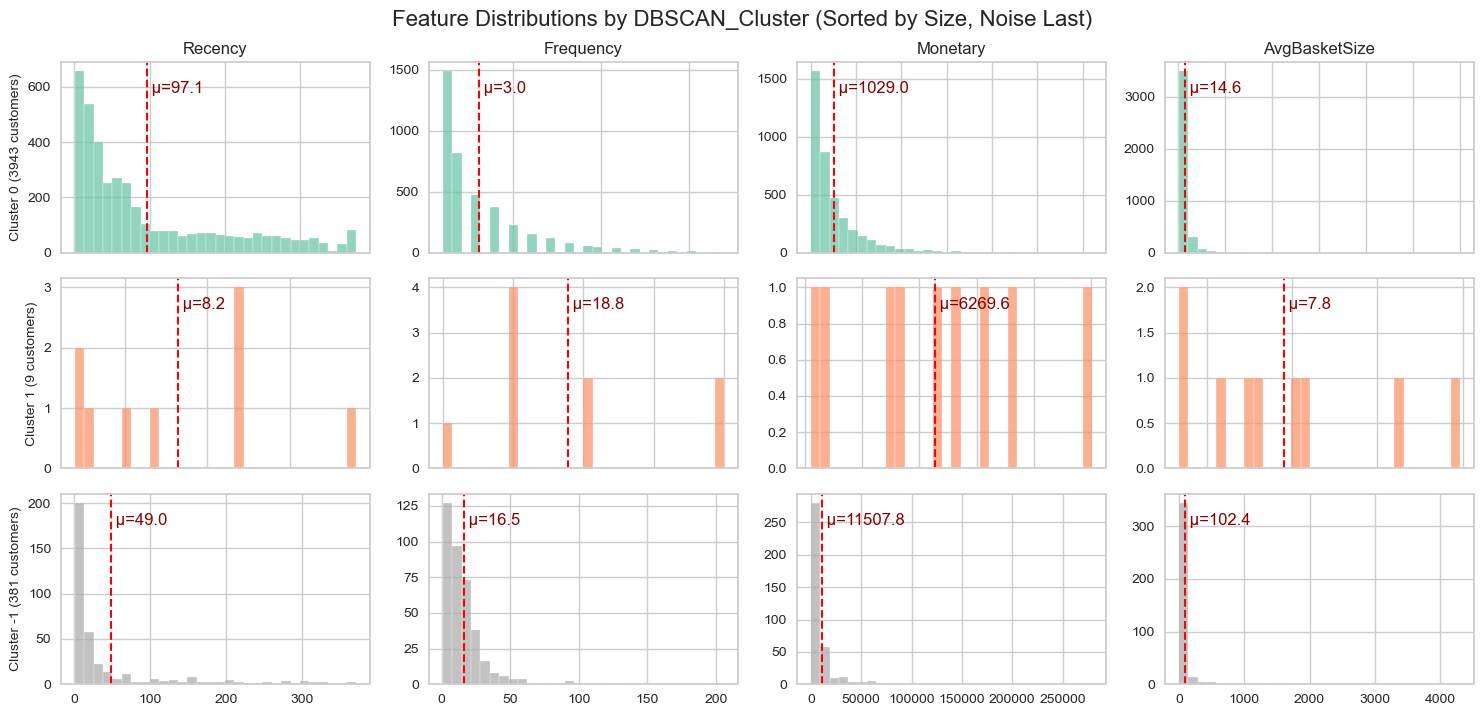

In [45]:
cluster_comparison = ['kM_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster']
features_to_plot = ['Recency', 'Frequency', 'Monetary', 'AvgBasketSize']

for algo in cluster_comparison:

    cluster_sizes = customer_features[algo].value_counts()

    # Separate -1 (outlier cluster) if it exists
    if -1 in cluster_sizes.index:
        non_outlier_clusters = cluster_sizes.drop(-1).sort_values(ascending=False)
        sorted_clusters = non_outlier_clusters.index.tolist() + [-1]  # Place -1 last
    else:
        sorted_clusters = cluster_sizes.sort_values(ascending=False).index.tolist()

    num_clusters = len(sorted_clusters)
    print(f"\n{algo} has {num_clusters} clusters (sorted by size, noise last)")

    cluster_mapping = {cluster: idx for idx, cluster in enumerate(sorted_clusters)}

    # Define custom colors
    distinct_colors = sns.color_palette("Set2", n_colors=num_clusters - (1 if -1 in sorted_clusters else 0))
    color_map = {cluster: distinct_colors[i] for i, cluster in enumerate(sorted_clusters) if cluster != -1}
    color_map[-1] = '#A9A9A9'  # Grey for DBSCAN noise

    fig, axes = plt.subplots(num_clusters, 4, figsize=(fs))

    for cluster in sorted_clusters:
        cluster_idx = cluster_mapping[cluster]  # Sorted index
        cluster_data = customer_features[customer_features[algo] == cluster]

        for j, feature in enumerate(features_to_plot):

            feature_data = cluster_data[feature]
            ax = axes[cluster_idx, j]

            ax.hist(
                feature_data,
                bins=30,
                color=color_map[cluster],
                edgecolor='white',
                alpha=0.7
            )

            mean_val = feature_data.mean()
            ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5)
            ax.text(mean_val, ax.get_ylim()[1] * 0.9, f' μ={mean_val:.1f}', 
                    verticalalignment='top', horizontalalignment='left', color='darkred')

            # Formatting: Titles, labels, and ticks
            if cluster_idx == 0:  
                ax.set_title(feature, fontsize=12)
            if j == 0:  
                ax.set_ylabel(f'Cluster {cluster} ({len(cluster_data)} customers)', fontsize=10)
                ax.set_xlabel('')
            else:
                ax.set_ylabel('')
                ax.set_xlabel('')

            # Hide x-axis labels except for bottom row
            if cluster_idx < num_clusters - 1:
                ax.tick_params(axis='x', labelbottom=False)

    plt.tight_layout()
    plt.suptitle(f'Feature Distributions by {algo} (Sorted by Size, Noise Last)', y=1.02, fontsize=16)
    plt.show()

# 7. Interpreting the results in a Buisness context